In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt 

tweets = pd.read_csv('combined.csv', encoding='latin')
tweets.head(5)

,tweet_date_created,tweet_id,tweet_text,language,sentiment,sentiment_score
0,2018-05-08T08:19:09,993767246437666816,Bayer Leverkusen goalkeeper Bernd Leno will no...,en,NEUTRAL,"{""Neutral"":0.7228581905364990234375,""Negative""..."
1,2018-07-02T19:28:00.331000,1013866900772835331,Gary Speed v Blackburn at St James in 2001/02 ...,en,NEUTRAL,"{""Neutral"":0.998256266117095947265625,""Negativ..."
2,2018-09-05T12:54:20.408000,1037323043360657408,@ChelseaFC Don't make him regret it and start ...,en,NEUTRAL,"{""Neutral"":0.912796199321746826171875,""Negativ..."
3,2018-05-08T10:42:17,993803266323550208,"@LiverpoolFF @AnfieldEdition He's a liar, made...",en,NEGATIVE,"{""Neutral"":0.3271420896053314208984375,""Negati..."
4,2018-08-07T07:29:59.136000,1026732168226267136,@theesk @Everton Didn't realise Kenwright is d...,en,NEUTRAL,"{""Neutral"":0.957906246185302734375,""Negative"":..."


In [2]:
tweets.drop(['tweet_date_created', 'language', 'sentiment_score'], axis=1, inplace=True)

In [3]:
duplicates = tweets[tweets.duplicated(subset=['tweet_id'], keep=False)]

if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate tweet ids. Removing duplicates...")
    tweets.drop_duplicates(subset=['tweet_id'], inplace=True)
else:
    print("No duplicate tweet ids found.")

Found 762643 duplicate tweet ids. Removing duplicates...


In [5]:
tweets.drop(['tweet_id'], axis=1, inplace=True)

In [7]:
tweets.to_csv('update_combined_dataset.csv', index=False)

In [8]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('update_combined_dataset.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")


The size of the file is 734.2 MB


In [13]:
import pandas as pd
import re

# Load the dataset
tweets = pd.read_csv('update_combined_dataset.csv')

# Convert the 'tweet_text' column to strings
tweets['tweet_text'] = tweets['tweet_text'].astype(str)

# Define a function to remove URLs from a string
def remove_urls(text):
    return re.sub(r"http\S+|www\S+", "", text)

# Apply the function to a column in the dataset
tweets['text_without_url'] = tweets['tweet_text'].apply(remove_urls)

tweets.drop(['tweet_text'], axis=1, inplace=True)

tweets.to_csv('no_urls.csv', index=False)

# Print the updated dataset
tweets.head(5)


,sentiment,text_without_url
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,@ChelseaFC Don't make him regret it and start ...
3,NEGATIVE,"@LiverpoolFF @AnfieldEdition He's a liar, made..."
4,NEUTRAL,@theesk @Everton Didn't realise Kenwright is d...


In [14]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('no_urls.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")

The size of the file is 699.5 MB


In [15]:
import pandas as pd
import re

# Load the dataset
tweets = pd.read_csv('no_urls.csv')
tweets.head(5)

,sentiment,text_without_url
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,@ChelseaFC Don't make him regret it and start ...
3,NEGATIVE,"@LiverpoolFF @AnfieldEdition He's a liar, made..."
4,NEUTRAL,@theesk @Everton Didn't realise Kenwright is d...


In [16]:
import pandas as pd
import re

# Load the dataset
tweets = pd.read_csv('no_urls.csv')

# Convert the 'tweet_text' column to strings
tweets['text_without_url'] = tweets['text_without_url'].astype(str)

# Define a function to remove URLs from a string
def remove_urls(text):
    return re.sub(r'@\w+', '', text)

# Apply the function to a column in the dataset
tweets['text_without_mentions'] = tweets['text_without_url'].apply(remove_urls)

tweets.drop(['text_without_url'], axis=1, inplace=True)

tweets.to_csv('no_mentions.csv', index=False)

# Print the updated dataset
tweets.head(5)


,sentiment,text_without_mentions
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,Don't make him regret it and start him over H...
3,NEGATIVE,"He's a liar, made up. I've unfollowed him as..."
4,NEUTRAL,Didn't realise Kenwright is due to leave at ...


In [17]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('no_mentions.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")

The size of the file is 585.6 MB


In [19]:
tweets = pd.read_csv('no_mentions.csv')
tweets.head(5)

,sentiment,text_without_mentions
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,Don't make him regret it and start him over H...
3,NEGATIVE,"He's a liar, made up. I've unfollowed him as..."
4,NEUTRAL,Didn't realise Kenwright is due to leave at ...


In [20]:
import pandas as pd
import re

# Load the dataset
tweets = pd.read_csv('no_mentions.csv')

# Convert the 'tweet_text' column to strings
tweets['text_without_mentions'] = tweets['text_without_mentions'].astype(str)

# Define a function to remove URLs from a string
def remove_urls(text):
    return re.sub(r'#\w+', '', text)

# Apply the function to a column in the dataset
tweets['text_without_hashtags'] = tweets['text_without_mentions'].apply(remove_urls)

tweets.drop(['text_without_mentions'], axis=1, inplace=True)

tweets.to_csv('no_hashtags.csv', index=False)

# Print the updated dataset
tweets.head(5)


,sentiment,text_without_hashtags
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,Don't make him regret it and start him over H...
3,NEGATIVE,"He's a liar, made up. I've unfollowed him as..."
4,NEUTRAL,Didn't realise Kenwright is due to leave at ...


In [21]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('no_hashtags.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")

The size of the file is 544.0 MB


In [10]:
import pandas as pd
import re
import string

# Load the dataset
tweets = pd.read_csv('no_hashtags.csv')

# Convert the 'text_without_hashtags' column to strings
tweets['text_without_hashtags'] = tweets['text_without_hashtags'].astype(str)

# Define a function to remove URLs and punctuation from a string
def remove_urls_and_punctuation(text):
    # Remove URLs
    text = re.sub(r'#\w+', '', text)
    # Remove punctuation
    translator = str.maketrans("", "", string.punctuation)
    text = text.translate(translator)
    return text

# Apply the function to a column in the dataset
tweets['text_without_punctuation'] = tweets['text_without_hashtags'].apply(remove_urls_and_punctuation)

# Drop the original 'text_without_hashtags' column
tweets.drop(['text_without_hashtags'], axis=1, inplace=True)

# Save the updated dataset to a CSV file
tweets.to_csv('no_punctuation2.csv', index=False)

# Print the updated dataset
print(tweets.head(5))


  sentiment                           text_without_punctuation
0   NEUTRAL  Bayer Leverkusen goalkeeper Bernd Leno will no...
1   NEUTRAL  Gary Speed v Blackburn at St James in 200102 a...
2   NEUTRAL   Dont make him regret it and start him over Ho...
3  NEGATIVE    Hes a liar made up Ive unfollowed him as loa...
4   NEUTRAL    Didnt realise Kenwright is due to leave at t...


In [11]:
import os

# Get the size of a file in bytes
file_size = os.path.getsize('no_punctuation2.csv')

# Convert the size to a human-readable format
if file_size < 1024:
    size_str = f"{file_size} bytes"
elif file_size < 1024 ** 2:
    size_str = f"{file_size / 1024:.1f} KB"
elif file_size < 1024 ** 3:
    size_str = f"{file_size / (1024 ** 2):.1f} MB"
else:
    size_str = f"{file_size / (1024 ** 3):.1f} GB"

# Print the size
print(f"The size of the file is {size_str}")

The size of the file is 523.3 MB


In [14]:
import pandas as pd

df = pd.read_csv('no_punctuation2.csv')
df.head(5)

,sentiment,text_without_punctuation
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 200102 a...
2,NEUTRAL,Dont make him regret it and start him over Ho...
3,NEGATIVE,Hes a liar made up Ive unfollowed him as loa...
4,NEUTRAL,Didnt realise Kenwright is due to leave at t...


In [15]:
import pandas as pd
from collections import Counter
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

df['text_without_punctuation'] = df['text_without_punctuation'].astype(str)

df['tokens'] = df['text_without_punctuation'].apply(lambda x: nltk.word_tokenize(x) if isinstance(x, str) else [])
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words and word.lower() != 'amp'])

all_words = [word for tokens in df['filtered_tokens'] for word in tokens]
word_freq = Counter(all_words)
word_freq_df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])
word_freq_df = word_freq_df.sort_values(by=['Frequency'], ascending=False)
print(word_freq_df.head(20))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\clayt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\clayt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


         Frequency
season      322254
get         267543
like        258804
team        248429
game        235851
one         226039
good        213893
back        210825
amp         205624
see         196305
players     188987
best        187844
us          184058
player      180938
club        180209
time        179075
fans        170948
would       170243
win         165944
play        164726


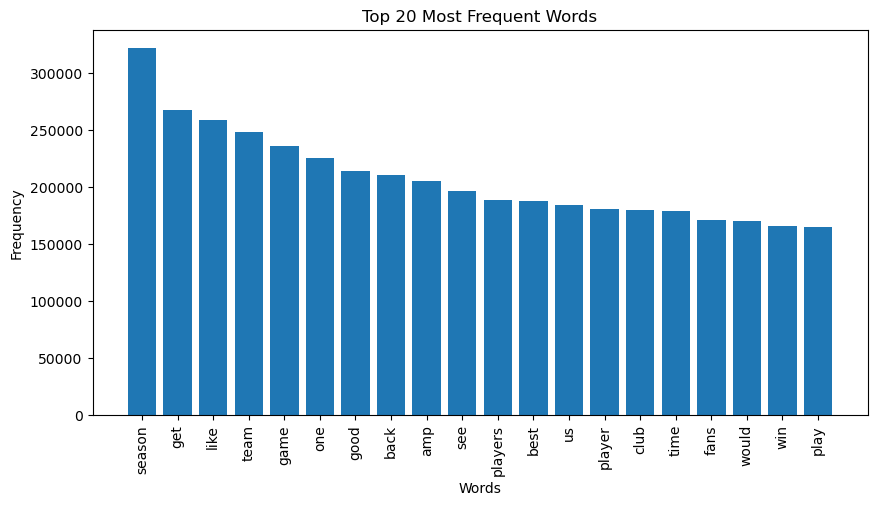

In [16]:
import matplotlib.pyplot as plt

# Select top 20 most frequent words
top_words = word_freq_df.head(20)

# Create bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_words.index, top_words['Frequency'])
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()


In [1]:
positive_tweets = tweets[tweets['sentiment'] == 'POSITIVE']
negative_tweets = tweets[tweets['sentiment'] == 'NEGATIVE']
neutral_tweets = tweets[tweets['sentiment'] == 'NEUTRAL']
mixed_tweets = tweets[tweets['sentiment'] == 'MIXED']

print('No of positive tagged tweets is: {}'.format(len(positive_tweets)))
print('No of negative tagged tweets is: {}'.format(len(negative_tweets)))
print('No of neutral tagged tweets is: {}'.format(len(neutral_tweets)))
print('No of mixed tagged tweets is: {}'.format(len(mixed_tweets)))

NameError: name 'tweets' is not defined

In [26]:
tweets.head(5)

,sentiment,text_without_punctuation
0,NEUTRAL,Bayer Leverkusen goalkeeper Bernd Leno will no...
1,NEUTRAL,Gary Speed v Blackburn at St James in 2001/02 ...
2,NEUTRAL,Don't make him regret it and start him over H...
3,NEGATIVE,"He's a liar, made up. I've unfollowed him as..."
4,NEUTRAL,Didn't realise Kenwright is due to leave at ...
